# 미니 프로젝트

- 이걸 하는 이유
    - 우리 아까는 네개의 원본이미지에서 그림판을 통해 x,y를 얻어옴
    - 이 과정이 귀찮음 -> 자동으로 스캔하도록

### 마우스 이벤트 등록

- 마우스를 움직일 때마다 이벤트 발생 -> 이걸 가져오는 함수 만들기

In [ ]:
import cv2

def mouse_handler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 누르는 이벤트가 발생했을 때
        print('왼쪽 버튼 Down')
        print(x, y)
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼에서 손가락 똈을 때
        print('왼쪽 버튼 Up')
        print(x, y)
    elif event == cv2.EVENT_LBUTTONDBLCLK: # 마우스 왼쪽 버튼 더블 클릭했을 때
        print('왼쪽 버튼 Double Click')
#     elif event == cv2.EVENT_MOUSEMOVE: # 마우스 이동
#         print('마우스 이동')
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 버튼 Down
        print('오른쪽 버튼 Down')

img = cv2.imread('poker.jpg')
cv2.namedWindow('img') # img 란 이름의 윈도우를 먼저 만들어두는 것. 여기에 마우스 이벤트를 처리하기 위한 핸들러 적용
cv2.setMouseCallback('img', mouse_handler) #윈도우에다 이벤트 처리를 위한 handler를 달아줌 -> 물론 handler는 위에서 작성필요!

#아래는 결과값이윈도우에 출력되게끔 하는 함수들
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 누르는 이벤트가 발생했을 때
#         print('왼쪽 버튼 Down')
#         print(x, y)
#     elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼에서 손가락 똈을 때
#         print('왼쪽 버튼 Up')
#         print(x, y)

# 이 함수로 인해 x,y값을 반환하길 원하는 지점을 마우스로 한번 클릭하면 '왼쪽버튼 down'이라는 값과 그 때의 x,y값 반환하고 
# 왼쪽버튼 down하고 up하지 않은 채로 다음 x,y값을 알고 싶은 곳에 가서 마우스클릭을 떼면 왼쪽버튼 up이라는 값과 그 때의 x,y값 반환

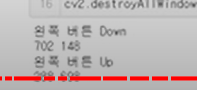

## 프로젝트 코드

In [6]:
import cv2
import numpy as np

point_list = [] #새로추가, 마우스핸들러를 통해 받은 값들을 적어주기 위해서

# 아래로는 이미지 불러오는거 다 동일
src_img = cv2.imread('poker.jpg')
src_img = cv2.resize(src_img, None, fx=0.5, fy=0.5) # 이미지가 너무 커서 0.5 배로 축소

COLOR = (255, 0, 255) # 핑크
THICKNESS = 2
drawing = False # 선을 그릴지 여부, 아직 클릭하지 않았으면 선을 그리면 안되니까

#아래로는 mouse_handler 복붙

def mouse_handler(event, x, y, flags, param):
    global drawing # 안에서도 drawing변수를 쓰고자 global선언
    dst_img = src_img.copy()
    # copy한 이유 -> 핸들러로 새로운 움직임이 있을 때마다 원본이미지에 안덮어씌우고 계속 복사본을 만들어서 보여줌 
    
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 Down
        drawing = True # 클릭했으니까 이때부터 선을 그리기 시작
        point_list.append((x, y)) # 위에 만들어놓은 빈 리스트에 받아온 x,y를 튜플형태로 저장
     
    if drawing: # 선을 그리기 시작한 상태냐?
        prev_point = None # 직선의 시작점, 내 맘대로 시작할거니까 none선언
        
# for문을 통해 받아온 x,y부분을 바로 이미지에 표시하도록
        for point in point_list:
            cv2.circle(dst_img, point, 10, COLOR, cv2.FILLED) #원 도형 그리기
            if prev_point: #기존의 점이 있냐? 두번째 점을 찍었을때부터 나타날 것 시작점은 None이었으니까
                cv2.line(dst_img, prev_point, point, COLOR, THICKNESS, cv2.LINE_AA) # 직선 잇기
                #- 소스 이미지에다 그릴건데, 기존 점에서, 그 다음 점까지 잇고, color는 위에 정의한거 두께도 위에 정의 line스타일 정의
            prev_point = point
            # 기존 포인트는 이제 이번에 찍었던 점으로 변경해줘야함
        
        next_point = (x, y) # 얘는 mousemove할때마다 받아오는 x,y좌표
        if len(point_list) == 4: # point_list가 4다 == 네개의 지점이 모두 준비가 되었다.
            show_result() # 결과 출력
            next_point = point_list[0] # 첫 번째 클릭한 지점, 실시간으로 따라다니면서 점을 찍는데 next_point가 찍은 네번째점과 기존 prev_point에서 찍은 점을 연결
            
        cv2.line(dst_img, prev_point, next_point, COLOR, THICKNESS, cv2.LINE_AA)
        
    cv2.imshow('img', dst_img)
   

def show_result():
    width, height = 530 // 2, 710 // 2 # 이미지가 너무 커서 0.5 배로 축소
    src = np.float32(point_list)
    dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
    # 좌상, 우상, 우하, 좌하 (시계 방향으로 4 지점 정의)

    matrix = cv2.getPerspectiveTransform(src, dst) # Matrix 얻어옴
    result = cv2.warpPerspective(src_img, matrix, (width, height)) # matrix 대로 변환을 함
    cv2.imshow('result', result)

cv2.namedWindow('img') # img 란 이름의 윈도우를 먼저 만들어두는 것. 여기에 마우스 이벤트를 처리하기 위한 핸들러 적용
cv2.setMouseCallback('img', mouse_handler)
cv2.imshow('img', src_img)
cv2.waitKey(0)
cv2.destroyAllWindows()